# Experiment 1

In [17]:
import random
random.seed(0)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

In [18]:
import logging

from src.simulation import Simulation
from src.network import Network
from src.render import Render

logging.disable(logging.CRITICAL)

In [19]:
# Relative Path to Network INP File
network_file = 'networks/Net3.inp'
# Create the environment
env = Network(network_file)
# Get all the nodes in the network with degree = 1 - these will be the possible start nodes
g = env.water_network_model.to_graph().to_undirected()
deg = g.degree
start_pool = [node for node, degree in deg if degree == 1]
print(f"Start pool: {start_pool}")
print(f"Number of start nodes: {len(start_pool)}")
print(f"Number of nodes: {len(g.nodes)}")

Start pool: ['15', '35', '131', '166', '167', '203', '219', '225', '231', '243', '253', 'River', 'Lake', '1', '2', '3']
Number of start nodes: 16
Number of nodes: 97


## Create simulations
### Simulation parameters:
- env: the network environment - Net3
- num_agents: the number of agents to create - 10
- swarm: whether to use swarm intelligence - all of options will be tested
- swarm_config: the swarm configuration - all of options will be tested
- start_node: the start node for the simulation - random sample of 15 nodes from the start node pool
- max_turns: the maximum number of turns to run the simulation - 100

In [20]:
start_nodes = random.sample(start_pool, 15)
num_agents = 10
max_turns = 100

### Experiment 1.1
- env: Net3
- num_agents: 10
- swarm: False
- swarm_config: None
- start_node: random choice of 15 nodes
- max_turns: 100
- filepath: notable-results/Experiment1/NoSwarm

In [21]:
simulations = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=False, start_positions=[start_node], filepath="notable-results/Experiment-1/NoSwarm")
    simulations.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print("Done")

Starting simulation with start node: Lake
Starting simulation with start node: 3
Starting simulation with start node: 219
Starting simulation with start node: 15
Starting simulation with start node: 167
Starting simulation with start node: 231
Starting simulation with start node: 225
Starting simulation with start node: 1
Starting simulation with start node: River
Starting simulation with start node: 166
Starting simulation with start node: 131
Starting simulation with start node: 243
Starting simulation with start node: 35
Starting simulation with start node: 203
Starting simulation with start node: 2
Done


In [22]:
# Load the results from each simulation into a dataframe
df_1_1 = pd.DataFrame()

for start_node, path in simulations:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the simulations dataframe as the turn number
    if df_1_1.empty:
        df_1_1 = df_temp
        # Add a column for the start node
        df_1_1['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_1 = pd.concat([df_1_1, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_1.loc['avg'] = df_1_1.mean(numeric_only=True, axis=0)
df_1_1.loc['max'] = df_1_1.max(numeric_only=True, axis=0)
df_1_1.loc['min'] = df_1_1.min(numeric_only=True, axis=0)

In [23]:
# df_1_1

### Experiment 1.2
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: naive
- start_node: random choice of 15 nodes
- max_turns: 100
- filepath: notable-results/Experiment1/NaiveSwarm

In [24]:
swarm_config = {'swarm': True, 'swarm_type': 'naive'}

simulations = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/NaiveSwarm")
    simulations.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print("Done")

Starting simulation with start node: Lake
Starting simulation with start node: 3
Starting simulation with start node: 219
Starting simulation with start node: 15
Starting simulation with start node: 167
Starting simulation with start node: 231
Starting simulation with start node: 225
Starting simulation with start node: 1
Starting simulation with start node: River
Starting simulation with start node: 166
Starting simulation with start node: 131
Starting simulation with start node: 243
Starting simulation with start node: 35
Starting simulation with start node: 203
Starting simulation with start node: 2
Done


In [25]:
# Load the results from each simulation into a dataframe
df_1_2 = pd.DataFrame()

for start_node, path in simulations:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_2.empty:
        df_1_2 = df_temp
        # Add a column for the start node
        df_1_2['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_2 = pd.concat([df_1_2, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_2.loc['avg'] = df_1_2.mean(numeric_only=True, axis=0)
df_1_2.loc['max'] = df_1_2.max(numeric_only=True, axis=0)
df_1_2.loc['min'] = df_1_2.min(numeric_only=True, axis=0)

In [26]:
# df_1_2

### Experiment 1.3
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, mean
- start_node: random choice of 15 nodes
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMeanSwarm

In [27]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'mean'}

simulations = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMeanSwarm")
    simulations.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print("Done")

Starting simulation with start node: Lake
Starting simulation with start node: 3
Starting simulation with start node: 219
Starting simulation with start node: 15
Starting simulation with start node: 167
Starting simulation with start node: 231
Starting simulation with start node: 225
Starting simulation with start node: 1
Starting simulation with start node: River
Starting simulation with start node: 166
Starting simulation with start node: 131
Starting simulation with start node: 243
Starting simulation with start node: 35
Starting simulation with start node: 203
Starting simulation with start node: 2
Done


In [28]:
# Load the results from each simulation into a dataframe
df_1_3 = pd.DataFrame()

for start_node, path in simulations:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_3.empty:
        df_1_3 = df_temp
        # Add a column for the start node
        df_1_3['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_3 = pd.concat([df_1_3, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_3.loc['avg'] = df_1_3.mean(numeric_only=True, axis=0)
df_1_3.loc['max'] = df_1_3.max(numeric_only=True, axis=0)
df_1_3.loc['min'] = df_1_3.min(numeric_only=True, axis=0)

In [29]:
# df_1_3

### Experiment 1.4
- env: Net3
- num_agents: 10
- swarm: True
- swarm_config: informed, median
- start_node: random choice of 15 nodes
- max_turns: 100
- filepath: notable-results/Experiment1/InformedMedianSwarm

In [30]:
swarm_config = {'swarm': True, 'swarm_type': 'informed', 'allocation_threshold': 'median'}

simulations = []

for start_node in start_nodes:
    # Create the simulation
    print(f"Starting simulation with start node: {start_node}")
    sim = Simulation(env, num_agents=10, swarm=True, swarm_config=swarm_config, start_positions=[start_node], filepath="notable-results/Experiment-1/InformedMedianSwarm")
    simulations.append((start_node, sim.path_to_results_directory))
    # Run the simulation
    sim.run(max_turns=max_turns)
    
print("Done")

Starting simulation with start node: Lake
Starting simulation with start node: 3
Starting simulation with start node: 219
Starting simulation with start node: 15
Starting simulation with start node: 167
Starting simulation with start node: 231
Starting simulation with start node: 225
Starting simulation with start node: 1
Starting simulation with start node: River
Starting simulation with start node: 166
Starting simulation with start node: 131
Starting simulation with start node: 243
Starting simulation with start node: 35
Starting simulation with start node: 203
Starting simulation with start node: 2
Done


In [31]:
# Load the results from each simulation into a dataframe
df_1_4 = pd.DataFrame()

for start_node, path in simulations:
    df_temp = pd.read_csv(f"{path}/results.csv")
    
    # Transpose the dataframe and make the turn number the column name
    df_temp = df_temp.T
    df_temp.columns = df_temp.iloc[0].astype(int)
    df_temp = df_temp.drop(df_temp.index[0])
    
    # If this is the first iteration, create the columns of the main dataframe as the turn number
    if df_1_4.empty:
        df_1_4 = df_temp
        # Add a column for the start node
        df_1_4['start_node'] = start_node
    else:
        # Add a column for the start node
        df_temp['start_node'] = start_node
        df_1_4 = pd.concat([df_1_4, df_temp], axis=0)
        
# Create a row with the average pct_explored for each turn
df_1_4.loc['avg'] = df_1_4.mean(numeric_only=True, axis=0)
df_1_4.loc['max'] = df_1_4.max(numeric_only=True, axis=0)
df_1_4.loc['min'] = df_1_4.min(numeric_only=True, axis=0)

In [32]:
# df_1_4

## Analysis

In [44]:
experiment1_results = pd.DataFrame()

experiment1_results['no-swarm-avg'] = df_1_1.loc['avg']
experiment1_results['no-swarm-max'] = df_1_1.loc['max']
experiment1_results['no-swarm-min'] = df_1_1.loc['min']

experiment1_results['naive-avg'] = df_1_2.loc['avg']
experiment1_results['naive-max'] = df_1_2.loc['max']
experiment1_results['naive-min'] = df_1_2.loc['min']

experiment1_results['informed-mean-avg'] = df_1_3.loc['avg']
experiment1_results['informed-mean-max'] = df_1_3.loc['max']
experiment1_results['informed-mean-min'] = df_1_3.loc['min']

experiment1_results['informed-median-avg'] = df_1_4.loc['avg']
experiment1_results['informed-median-max'] = df_1_4.loc['max']
experiment1_results['informed-median-min'] = df_1_4.loc['min']

experiment1_results.drop(index='start_node', inplace=True)

experiment1_results.head()

,no-swarm-avg,no-swarm-max,no-swarm-min,naive-avg,naive-max,naive-min,informed-mean-avg,informed-mean-max,informed-mean-min,informed-median-avg,informed-median-max,informed-median-min
turn,,,,,,,,,,,,
0,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928
1,2.061856,2.061856,2.061856,4.123711,5.154639,3.092784,3.780069,5.154639,3.092784,3.780069,5.154639,3.092784
2,3.092784,3.092784,3.092784,6.460481,9.278351,5.154639,6.04811,9.278351,5.154639,6.323024,9.278351,5.154639
3,4.123711,4.123711,4.123711,8.453608,12.371134,6.185567,8.728522,13.402062,7.216495,9.278351,13.402062,7.216495
4,5.154639,5.154639,5.154639,10.034364,15.463918,7.216495,11.821306,18.556701,9.278351,12.714777,18.556701,10.309278


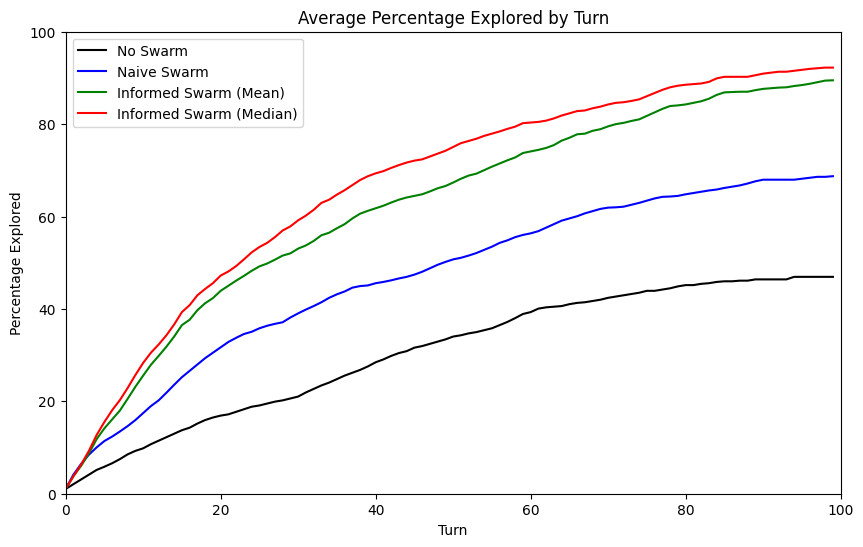

In [45]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results
ax.plot(experiment1_results.index, experiment1_results['no-swarm-avg'], label='No Swarm', color='black')

# Plot the naive swarm results
ax.plot(experiment1_results.index, experiment1_results['naive-avg'], label='Naive Swarm', color='blue')

# Plot the informed swarm results
ax.plot(experiment1_results.index, experiment1_results['informed-mean-avg'], label='Informed Swarm (Mean)', color='green')
ax.plot(experiment1_results.index, experiment1_results['informed-median-avg'], label='Informed Swarm (Median)', color='red')

# Set the title and labels
ax.set_title("Average Percentage Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

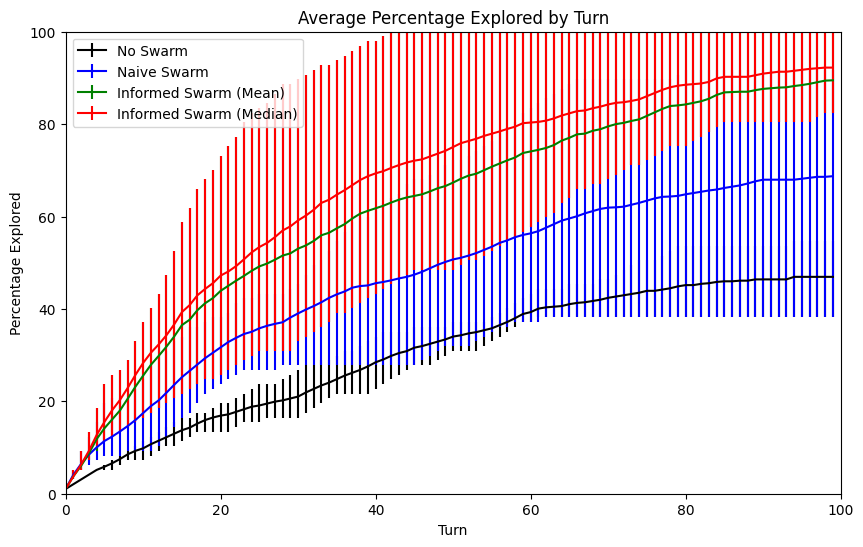

In [50]:
# Plot the avg results for each swarm type as a function of turns with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results
ax.errorbar(
    experiment1_results.index, 
    experiment1_results['no-swarm-avg'], 
    yerr=[experiment1_results['no-swarm-avg'] - experiment1_results['no-swarm-min'], experiment1_results['no-swarm-max'] - experiment1_results['no-swarm-avg']], 
    label='No Swarm', 
    color='black')
# Plot the naive swarm results
ax.errorbar(
    experiment1_results.index, 
    experiment1_results['naive-avg'], 
    yerr=[experiment1_results['naive-avg'] - experiment1_results['naive-min'], experiment1_results['naive-max'] - experiment1_results['naive-avg']], 
    label='Naive Swarm', 
    color='blue')
# Plot the informed swarm results
ax.errorbar(
    experiment1_results.index, 
    experiment1_results['informed-mean-avg'], 
    yerr=[experiment1_results['informed-mean-avg'] - experiment1_results['informed-mean-min'], experiment1_results['informed-mean-max'] - experiment1_results['informed-mean-avg']], 
    label='Informed Swarm (Mean)', 
    color='green')
# Plot the informed swarm results
ax.errorbar(
    experiment1_results.index, 
    experiment1_results['informed-median-avg'], 
    yerr=[experiment1_results['informed-median-avg'] - experiment1_results['informed-median-min'], experiment1_results['informed-median-max'] - experiment1_results['informed-median-avg']], 
    label='Informed Swarm (Median)', 
    color='red')

# Set the title and labels
ax.set_title("Average Percentage Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Explored")
# Set the legend
ax.legend()
# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)
# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()

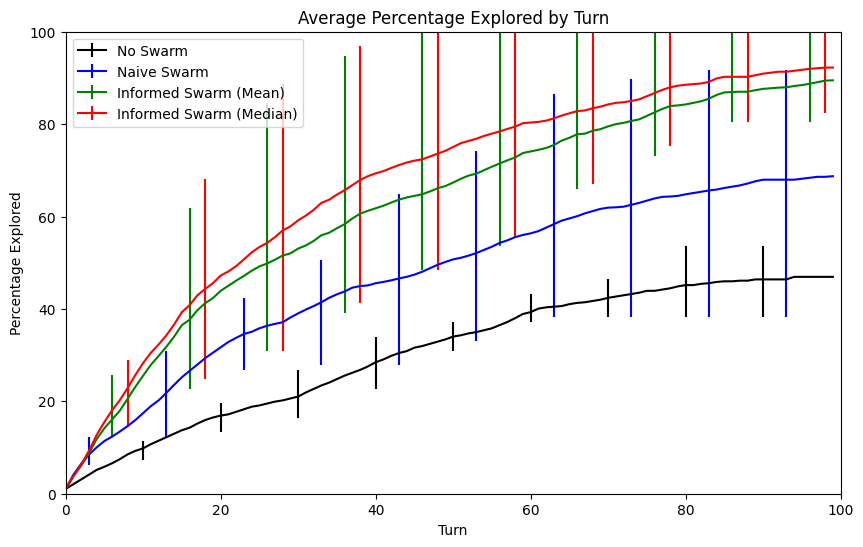

In [60]:
# Plot the avg results for each swarm type as a function of turns
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the no swarm results with error bars
ax.errorbar(
    experiment1_results.index,
    experiment1_results['no-swarm-avg'],
    yerr=[experiment1_results['no-swarm-avg'] - experiment1_results['no-swarm-min'], experiment1_results['no-swarm-max'] - experiment1_results['no-swarm-avg']],
    errorevery=(0,10),
    label='No Swarm',
    color='black')

# Plot the naive swarm results with error bars
ax.errorbar(
    experiment1_results.index,
    experiment1_results['naive-avg'],
    yerr=[experiment1_results['naive-avg'] - experiment1_results['naive-min'], experiment1_results['naive-max'] - experiment1_results['naive-avg']],
    errorevery=(3,10),
    label='Naive Swarm',
    color='blue')

# Plot the informed swarm results
ax.errorbar(
    experiment1_results.index, 
    experiment1_results['informed-mean-avg'], 
    yerr=[experiment1_results['informed-mean-avg'] - experiment1_results['informed-mean-min'], experiment1_results['informed-mean-max'] - experiment1_results['informed-mean-avg']], 
    errorevery=(6,10),
    label='Informed Swarm (Mean)', 
    color='green')

# Plot the informed swarm results
ax.errorbar(
    experiment1_results.index, 
    experiment1_results['informed-median-avg'], 
    yerr=[experiment1_results['informed-median-avg'] - experiment1_results['informed-median-min'], experiment1_results['informed-median-max'] - experiment1_results['informed-median-avg']], 
    errorevery=(8,10),
    label='Informed Swarm (Median)', 
    color='red')



# Set the title and labels
ax.set_title("Average Percentage Explored by Turn")
ax.set_xlabel("Turn")
ax.set_ylabel("Percentage Explored")

# Set the legend
ax.legend()

# Set the y axis to be between 0 and 100
ax.set_ylim(0, 100)

# Set the x axis to be between 0 and 100
ax.set_xlim(0, 100)

# Show the plot
plt.show()